### 贝叶斯定理

#### 用来描述关于随机事件A和B的两个条件概率之间的关系，如P(A|B),P(B|A)

#### 在贝叶斯定理中，每个名词都有约定俗成的名称。
##### P(A)是A的先验概率，之所以被称为“先验概率”是因为它不考虑任何B方面的因素，P(B)也是B的先验概率。
##### P(B|A)是已知随机事件A发生后随机事件B的条件概率，P(A|B)是后验概率，一般是求解目标。

##### 1.先验概率：通过经验来判断事件发生的概率。
##### 2.后验概率：在已知结果的前提下，推测其造成原因的概率。
##### 3.条件概率：在随机事件A已经发生的情况下，随机事件B发生的概率，用公式表示为P(B|A)，读作“在A发生的条件下B发生的概率”。

### 1.高斯朴素贝叶斯

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

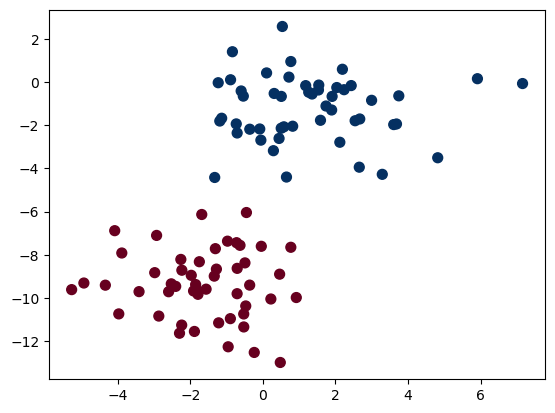

In [2]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.show()

#### 通过make_blobs方法生成的随机变量X是连续型变量，符合高斯分布。
##### 可以使用高斯朴素贝叶斯

In [3]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [4]:
model = GaussianNB()
model.fit(X, y)
rng = np.random.RandomState(0)

##### 预测数据

In [5]:
Xnew = [-6, -14] + [14, 18] * rng.rand(20000, 2)
print(Xnew[:5])
ynew = model.predict(Xnew)
print(ynew[:5])

[[ 1.68338905 -1.12659141]
 [ 2.43868727 -4.19210271]
 [-0.06883281 -2.37390596]
 [ 0.12622096  2.05191401]
 [ 7.49127865 -7.09805266]]
[1 1 1 1 1]


##### 生成随机20000个随机变量用来预测，绘制两类不同类型的分类的边界

#### 最后结果现实，高斯朴素贝叶斯的边界并不是直线，反而更像二次函数。

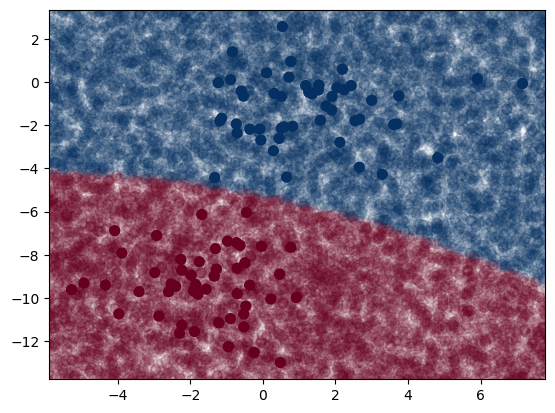

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=50, cmap='RdBu', alpha=0.1)
plt.axis(lim)
plt.show()

### 2.多项式朴素贝叶斯

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:
news = fetch_20newsgroups()
print(news.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


##### 查看数据

In [4]:
print(len(news.data))
print(news.data[0])

11314
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







##### 对数据训练集和测试集进行划分

In [6]:
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.25, random_state=33)
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

##### 利用贝叶斯分类器对数据进行分类

In [8]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_predict = mnb.predict(X_test)
print('The accuracy of Naive Bays Classifier is', mnb.score(X_test, y_test))
print(classification_report(y_test, y_predict, target_names=news.target_names))

The accuracy of Naive Bays Classifier is 0.8317426652527394
                          precision    recall  f1-score   support

             alt.atheism       0.89      0.88      0.88       108
           comp.graphics       0.62      0.86      0.72       130
 comp.os.ms-windows.misc       0.95      0.13      0.23       163
comp.sys.ibm.pc.hardware       0.56      0.77      0.64       141
   comp.sys.mac.hardware       0.91      0.83      0.87       145
          comp.windows.x       0.71      0.91      0.80       141
            misc.forsale       0.95      0.67      0.78       159
               rec.autos       0.87      0.90      0.89       139
         rec.motorcycles       0.96      0.94      0.95       153
      rec.sport.baseball       0.97      0.89      0.93       141
        rec.sport.hockey       0.96      0.97      0.96       148
               sci.crypt       0.75      0.99      0.85       143
         sci.electronics       0.90      0.79      0.84       160
               

### 3.伯努利朴素贝叶斯

#### 伯努利朴素贝叶斯的标签是布尔类型的，符合0-1分布，通常来说就是二分类标签。

In [10]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

In [11]:
X = np.array([[1, 2, 3, 4], [1, 3, 4, 4], [2, 4, 5, 5]])
y = np.array([1, 1, 2])

##### binarize阈值为3

##### 二值化后X如下
[[0, 0, 0, 1], 类别1
 [0, 0, 1, 1], 类别2
 [0, 1, 1, 1]] 类别3

In [12]:
clf = BernoulliNB(binarize=3.0)
clf.fit(X, y)

BernoulliNB(binarize=3.0)

##### 按类别顺序输出其对应的个数

In [13]:
print(clf.class_count_)

[2. 1.]


##### 各类别特征值之和

In [14]:
print(clf.feature_count_)

[[0. 0. 1. 2.]
 [0. 1. 1. 1.]]


##### 伯努利分布的各类别各特征P值

In [15]:
print(clf.feature_log_prob_)

[[-1.38629436 -1.38629436 -0.69314718 -0.28768207]
 [-1.09861229 -0.40546511 -0.40546511 -0.40546511]]
